## TP2- CIFAR10 classification using CNN

In this lab, we're going to perform classification task with **CIFAR10** dataset, using **CNN** and we're using the **TinyVGG** archtecture.

In [20]:
# importing libraries

import torch, torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader

import torchvision
import torchvision.transforms as transforms

import matplotlib.pyplot as plt
import numpy as np

from sklearn.metrics import classification_report, accuracy_score

In [2]:
# setup device

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

## Load CIFAR10 dataset

In [3]:
transform = transforms.Compose([
    transforms.ToTensor(),
])

In [4]:
# Load CIFAR10 dataset

train_set = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_set = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

100%|██████████| 170498071/170498071 [00:04<00:00, 35114379.71it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [5]:
train_set

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
           )

In [6]:
test_set

Dataset CIFAR10
    Number of datapoints: 10000
    Root location: ./data
    Split: Test
    StandardTransform
Transform: Compose(
               ToTensor()
           )

In [7]:
# Create DataLoader for training and testing

train_loader = torch.utils.data.DataLoader(train_set, batch_size=100, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=10000, shuffle=False)

In [8]:
images, labels = next(iter(train_loader))

In [9]:
images.shape

torch.Size([100, 3, 32, 32])

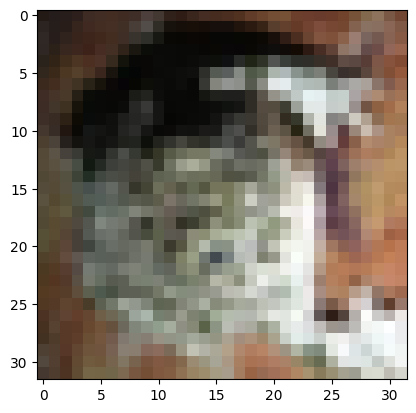

In [10]:
plt.imshow(images[0].permute(2, 1, 0))

## Build TinyVGG Model

In [11]:
class TinyVGG(nn.Module):

    def __init__(self, filters=10, num_classes=10):
        super(TinyVGG, self).__init__()

        self.cnn = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=filters, kernel_size=3, padding=1), 
            nn.LeakyReLU(inplace=True),
            nn.Conv2d(in_channels=filters, out_channels=filters, kernel_size=3, padding=1), 
            nn.LeakyReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(in_channels=filters, out_channels=filters, kernel_size=3, padding=1), 
            nn.LeakyReLU(inplace=True),
            nn.Conv2d(in_channels=filters, out_channels=filters, kernel_size=3, padding=1), 
            nn.LeakyReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )
        self.flatten = nn.Flatten()
        self.fc = nn.Sequential(
            nn.Linear(filters * 8 * 8, 128),
            nn.LeakyReLU(inplace=True),
            nn.Linear(128, 64),
            nn.LeakyReLU(inplace=True),
            nn.Linear(64, 32),
            nn.LeakyReLU(inplace=True),
            nn.Linear(32, num_classes)
        )

    def forward(self, input: torch.Tensor) -> torch.Tensor:
        out = self.cnn(input)
        out = self.flatten(out)
        return self.fc(out)

In [43]:
model = TinyVGG().to(device)

In [44]:
model

TinyVGG(
  (cnn): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): LeakyReLU(negative_slope=0.01, inplace=True)
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): LeakyReLU(negative_slope=0.01, inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): LeakyReLU(negative_slope=0.01, inplace=True)
    (7): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): LeakyReLU(negative_slope=0.01, inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc): Sequential(
    (0): Linear(in_features=640, out_features=128, bias=True)
    (1): LeakyReLU(negative_slope=0.01, inplace=True)
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): LeakyReLU(negative_slope=0.01, 

In [45]:
images.shape

torch.Size([100, 3, 32, 32])

In [46]:
model(images.to(device)).argmax(dim=1)

tensor([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2], device='cuda:0')

In [47]:
labels

tensor([6, 0, 6, 0, 4, 1, 2, 8, 3, 8, 9, 2, 7, 9, 2, 0, 9, 6, 3, 8, 5, 5, 0, 2,
        8, 4, 4, 8, 6, 5, 1, 8, 1, 6, 5, 5, 4, 1, 0, 6, 5, 4, 7, 9, 3, 7, 0, 7,
        6, 2, 9, 3, 9, 1, 4, 2, 4, 4, 4, 4, 6, 7, 2, 8, 8, 1, 9, 0, 0, 3, 1, 6,
        9, 0, 3, 3, 1, 0, 9, 7, 0, 4, 5, 9, 2, 7, 2, 0, 4, 8, 6, 8, 2, 3, 9, 9,
        3, 7, 3, 7])

In [48]:
criterion = nn.CrossEntropyLoss()

In [49]:
opt = optim.AdamW(model.parameters(), lr=0.001)

In [50]:
# This function is define to train the model, with MSELoss, and Adam optimizer.

def train(
    model,
    criterion,
    optimizer,
    train_loader,
    epochs=1,
    loggings: bool = True, 
    loggings_iter: int = 400,
) -> None:
    
    model.train()
    
    for epoch in range(epochs):
        
        for i, (img, lbl) in enumerate(train_loader):
            
            model.train()
        
            optimizer.zero_grad()
        
            pred_lbl = model(img.to(device))
            
            loss = criterion(pred_lbl, lbl.to(device))
            
            loss.backward()
            
            optimizer.step()

            if i%int(loggings_iter)==0:
                
                model.eval()
                
                train_acc = accuracy_score(pred_lbl.argmax(dim=1).cpu().detach().numpy(), lbl.cpu().detach().numpy())
                
                test_img, test_lbl = next(iter(test_loader))
                
                test_labels_pred = model(test_img.to(device)).argmax(dim=1)
                
                test_acc = accuracy_score(test_labels_pred.cpu().detach().numpy(), test_lbl.cpu().detach().numpy())             
                
                print(f"Epochs: {epoch:4d} | Iteration: {i:4d}| Loss: {loss.item():4.7f}| Train Acc: {train_acc*100:4.3f}%| Test Acc: {test_acc*100:4.3f}%")
                print("-"*140)

    print("-"*140)
    print("Traning is finished :) ")

In [51]:
train(
    model, 
    criterion, 
    opt, 
    train_loader,
    epochs=30,
    loggings_iter=250
)

Epochs:    0 | Iteration:    0| Loss: 2.2950664| Train Acc: 10.000%| Test Acc: 10.000%
--------------------------------------------------------------------------------------------------------------------------------------------
Epochs:    0 | Iteration:  250| Loss: 2.0393775| Train Acc: 22.000%| Test Acc: 26.600%
--------------------------------------------------------------------------------------------------------------------------------------------
Epochs:    1 | Iteration:    0| Loss: 1.8799130| Train Acc: 36.000%| Test Acc: 39.820%
--------------------------------------------------------------------------------------------------------------------------------------------
Epochs:    1 | Iteration:  250| Loss: 1.4741166| Train Acc: 41.000%| Test Acc: 46.540%
--------------------------------------------------------------------------------------------------------------------------------------------
Epochs:    2 | Iteration:    0| Loss: 1.5180773| Train Acc: 43.000%| Test Acc: 49.350%
-

In [52]:
!mkdir models

In [53]:
# save the model

torch.save(model.state_dict(), "./models/TinyVGG_V2_acc_train_91_test_acc_64.pth")

In [64]:
# load TinyVGG

model = TinyVGG().to(device)


model.load_state_dict(torch.load("./models/TinyVGG_V2_acc_train_91_test_acc_64.pth"))

<All keys matched successfully>

In [65]:
model

TinyVGG(
  (cnn): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): LeakyReLU(negative_slope=0.01, inplace=True)
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): LeakyReLU(negative_slope=0.01, inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): LeakyReLU(negative_slope=0.01, inplace=True)
    (7): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): LeakyReLU(negative_slope=0.01, inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc): Sequential(
    (0): Linear(in_features=640, out_features=128, bias=True)
    (1): LeakyReLU(negative_slope=0.01, inplace=True)
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): LeakyReLU(negative_slope=0.01, 

### TinyVGG Accuracy:

In [66]:
from sklearn.metrics import accuracy_score, classification_report

In [67]:
train_img, train_label = next(iter(DataLoader(train_set, batch_size=10000, shuffle=True))) 

In [68]:
test_img, test_label = next(iter(test_loader))

In [70]:
train_label_pred = model(train_img.to(device)).argmax(dim=1)

In [71]:
train_label_pred

tensor([3, 0, 1,  ..., 3, 8, 6], device='cuda:0')

In [72]:
print("Train Classification Report")
print(classification_report(train_label_pred.cpu(), train_label))

Train Classification Report
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      1033
           1       0.95      0.98      0.96      1005
           2       0.87      0.88      0.88       965
           3       0.77      0.90      0.83       866
           4       0.97      0.75      0.85      1282
           5       0.84      0.88      0.86       931
           6       0.89      0.96      0.93       932
           7       0.93      0.95      0.94       958
           8       0.93      0.99      0.96       926
           9       0.99      0.91      0.95      1102

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [73]:
test_label_pred = model(test_img.to(device)).argmax(dim=1)

In [74]:
print(classification_report(test_label_pred.cpu(), test_label))

              precision    recall  f1-score   support

           0       0.71      0.68      0.70      1043
           1       0.75      0.77      0.76       966
           2       0.51      0.49      0.50      1031
           3       0.40      0.51      0.44       782
           4       0.68      0.48      0.56      1422
           5       0.52      0.57      0.54       911
           6       0.64      0.73      0.68       877
           7       0.70      0.70      0.70       991
           8       0.69      0.82      0.75       836
           9       0.77      0.67      0.72      1141

    accuracy                           0.64     10000
   macro avg       0.64      0.64      0.64     10000
weighted avg       0.64      0.64      0.64     10000

